<a href="https://colab.research.google.com/github/ADRIANVM117/proyectos_propios/blob/main/Estadistica/analisis_exploratorio/relacion_entre_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import h5py

brfss= pd.read_hdf('/content/brfss.hdf5', 'brfss')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


  Created wheel for empiricaldist: filename=empiricaldist-0.6.3-py3-none-any.whl size=10545 sha256=4373740ab9982f457a243580077c1a08d68713c099b0ad6746061b907dc43209
  Stored in directory: /root/.cache/pip/wheels/be/4d/30/c131cf1cbb0046f14436cdd7a29f4cc8553d34754e3685d071
Successfully built empiricaldist


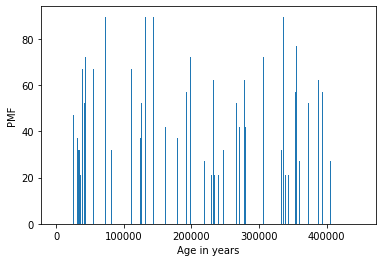

In [4]:
 !pip install empiricaldist
from empiricaldist import Pmf # <-- en la biblioteca empiricaldist se ecnuentra la función 
                                    # de masa de probabilidad
from empiricaldist import Cdf 


# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()



## scatterplot 

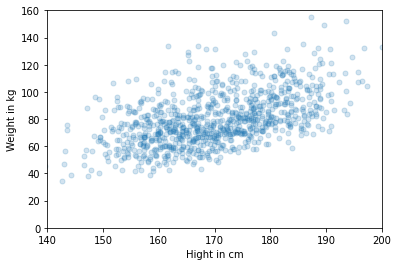

In [14]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to hight and weight 
hight = brfss['HTM4'] + np.random.normal(0,2.5, size = len(brfss))

weight = brfss['WTKG3'] + np.random.normal(0,2.5, size = len(brfss))


# Make a scatter plot

plt.plot(hight, weight, 'o', alpha = .2, markersize = 5)
plt.xlabel('Hight in cm')
plt.ylabel('Weight in kg')
plt.axis([140,200, 0, 160])
plt.show()

## Boxplot 

- Explicación : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

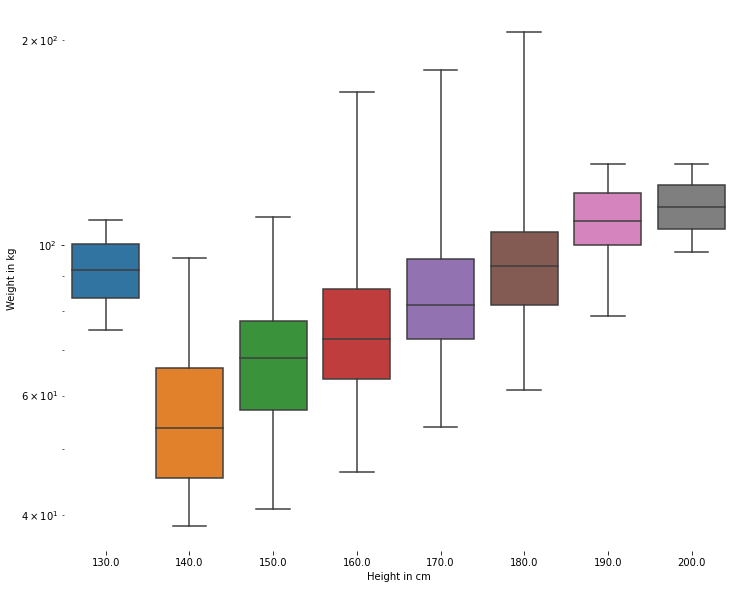

In [17]:
import seaborn as sns

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
plt.figure(figsize = (12,10))
sns.boxplot(x = '_HTMG10', y = 'WTKG3', data = data, whis = 10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


## Bar chat

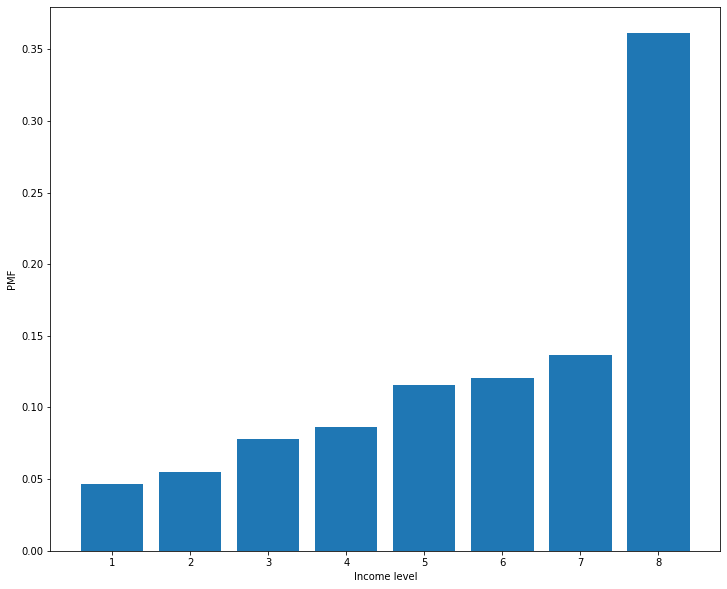

In [20]:

income = brfss['INCOME2']

#  PMF
plt.figure(figsize = (12,10))
Pmf.from_seq(income).bar()

# etiquetas
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

- Casi la mitad de los encuestados se encuentran entre la categoria mas alta de ingresos. 

- la desventaja es que no podemos diferenciar entre el ingreso mas alto y la media 

## Violin plot 

Explicación: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d



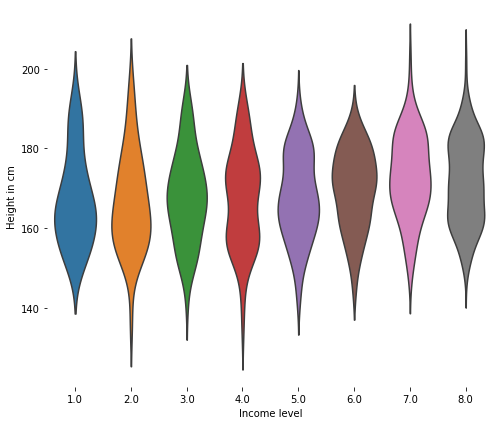

In [27]:
# eliminamos valores na dentro de las columnas seleccionadas 
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# violin plot 
plt.figure(figsize = (8,7))
sns.violinplot(x = 'INCOME2', y = 'HTM4', data = data, inner = None)

#  Eliminar las líneas innecesarias y etiquetar los ejes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## Correlación 

In [28]:
# Seleccionamos columnas
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]

# Calculamos correlation matrix
print(subset.corr())

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


## Regresión simple.

- Explicación: https://bootcampai.medium.com/la-regresi%C3%B3n-lineal-pr%C3%A1ctica-9077bcd18583



In [29]:
from scipy.stats import linregress

# Extraer las variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Calcular la regression
res = linregress(xs, ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


- La pediente se encuentra en .07000027 Quiere decir que mientras sus ingresos sean mas altos los encuestados ingieren mas vegetales

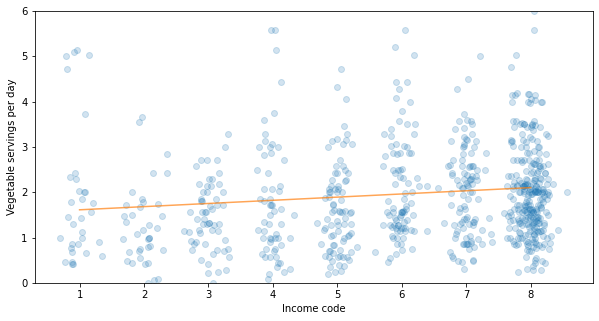

In [34]:
# Plot the scatter plot
plt.figure(figsize = (10,5))
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx 
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()